In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-feb-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-feb-2021/train.csv
/kaggle/input/tabular-playground-series-feb-2021/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

train = pd.read_csv("/kaggle/input/tabular-playground-series-feb-2021/train.csv")
test = pd.read_csv("/kaggle/input/tabular-playground-series-feb-2021/test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()

Train shape: (300000, 26)
Test shape: (200000, 25)


,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,A,B,A,A,B,D,A,E,C,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,B,A,A,A,B,B,A,E,A,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,A,A,A,C,B,D,A,B,C,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,A,A,A,C,B,D,A,E,G,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,A,B,A,A,B,B,A,E,C,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,300000.0,250018.576947,144450.150010,1.000000,124772.500000,250002.500000,375226.500000,499999.000000
cont0,300000.0,0.524634,0.204875,-0.093505,0.370451,0.492208,0.654793,1.052666
cont1,300000.0,0.506649,0.235269,-0.055105,0.352307,0.615156,0.688150,0.851746
cont2,300000.0,0.444115,0.200089,-0.060274,0.314121,0.457271,0.554835,1.017689
cont3,300000.0,0.446214,0.238669,0.134760,0.214572,0.377823,0.719758,1.006469
cont4,300000.0,0.455471,0.200695,0.189216,0.279853,0.411351,0.621808,0.994050
cont5,300000.0,0.508337,0.231612,-0.087247,0.338747,0.441384,0.709515,1.044433
cont6,300000.0,0.478345,0.192432,0.043953,0.339896,0.410090,0.604246,1.093312
cont7,300000.0,0.455904,0.204493,0.208703,0.278041,0.360736,0.639388,1.036541
cont8,300000.0,0.459321,0.220642,0.004041,0.308655,0.425801,0.541525,1.014156


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

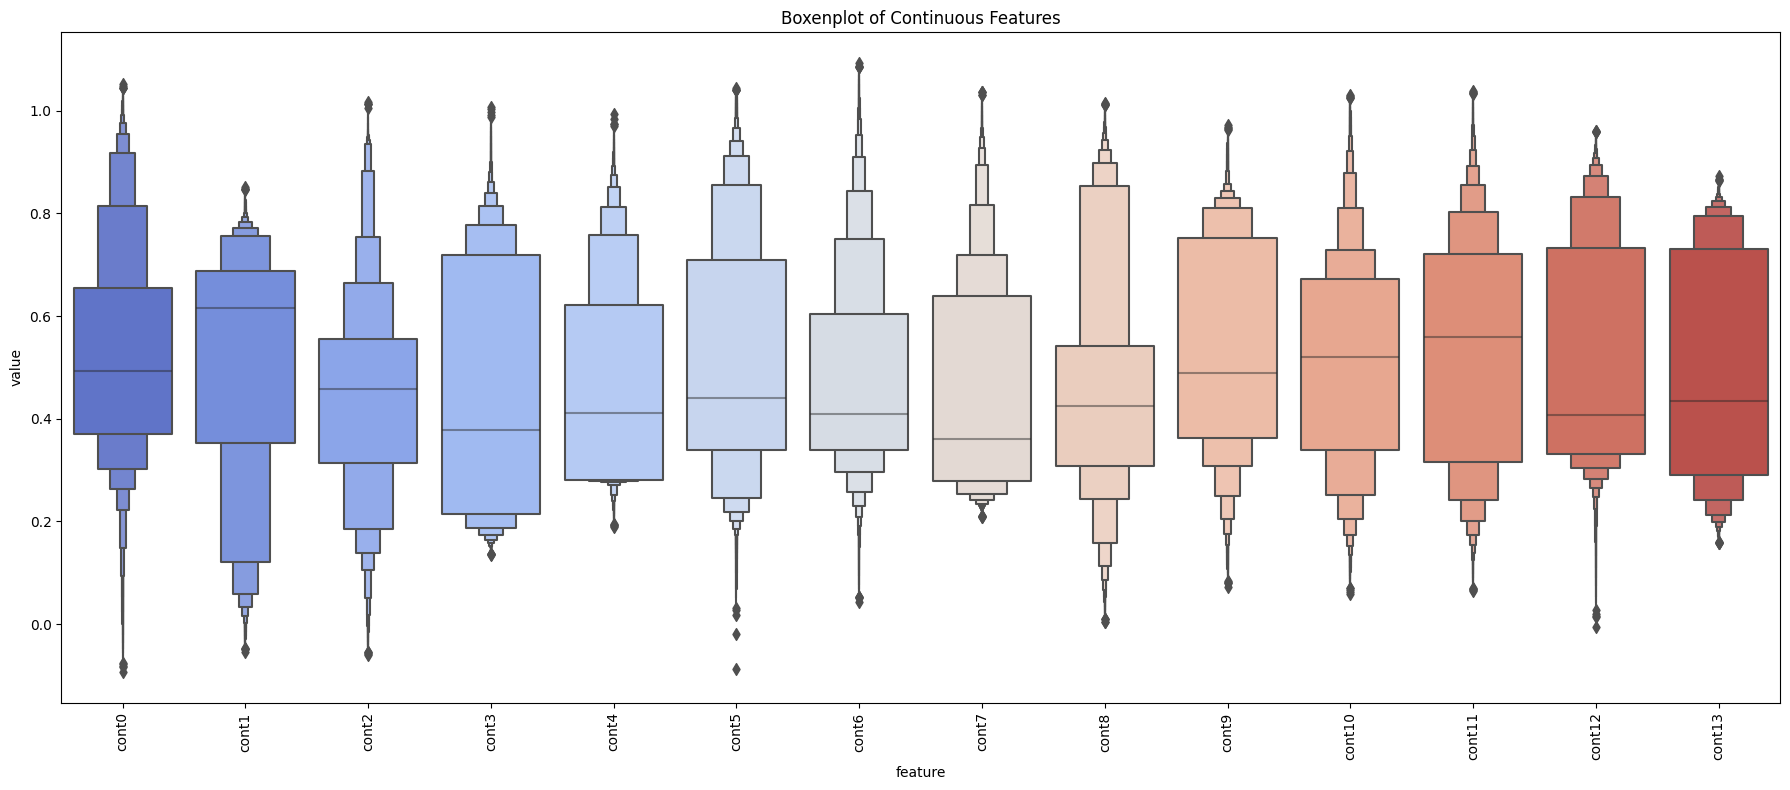

In [5]:
cont_features = [col for col in train.columns if 'cont' in col]


long_df = train[cont_features].melt(var_name='feature', value_name='value')


plt.figure(figsize=(18, 8))
sns.boxenplot(data=long_df, x='feature', y='value', palette='coolwarm')
plt.title("Boxenplot of Continuous Features")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


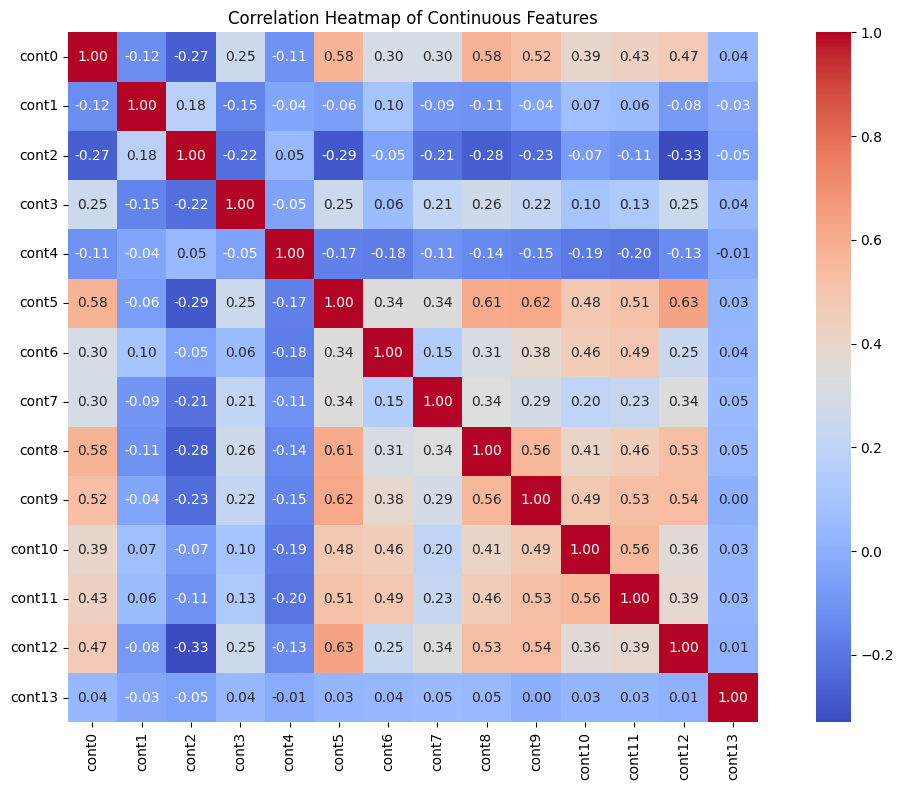

In [6]:
cont_features = [col for col in train.columns if 'cont' in col]


corr_matrix = train[cont_features].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Continuous Features")
plt.tight_layout()
plt.show()


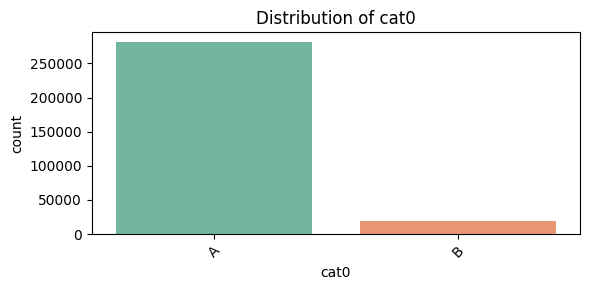

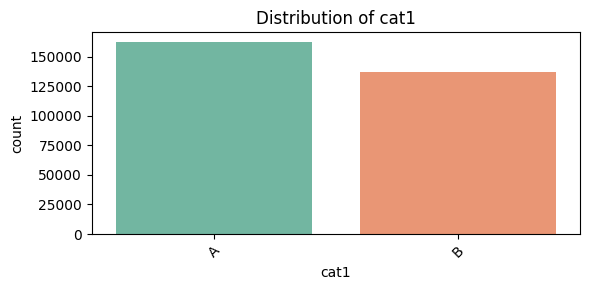

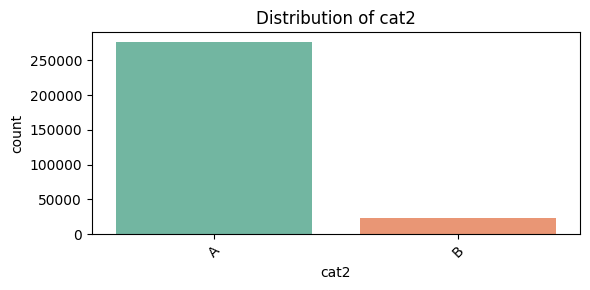

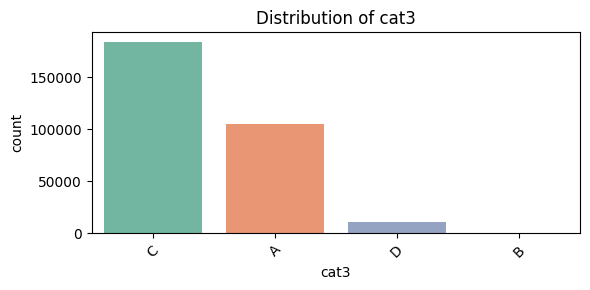

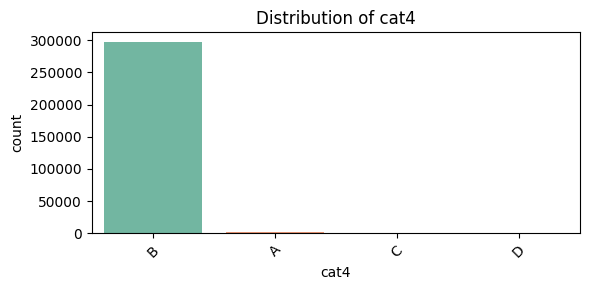

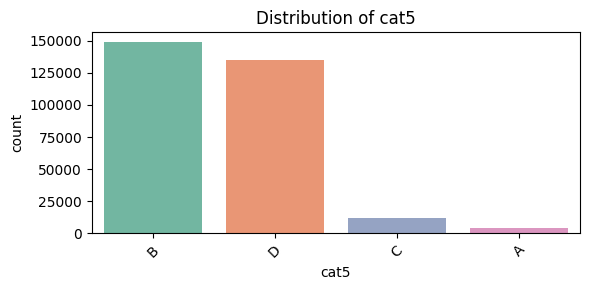

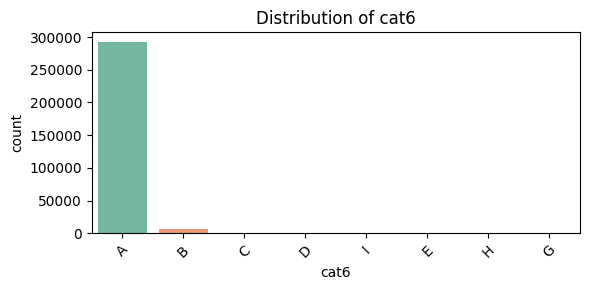

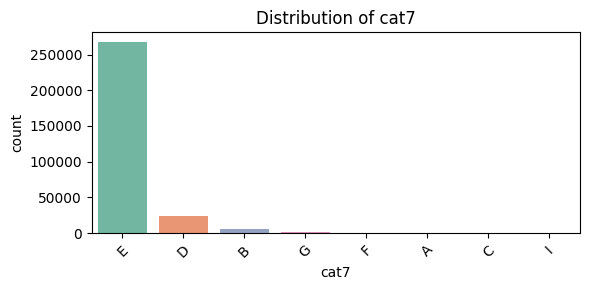

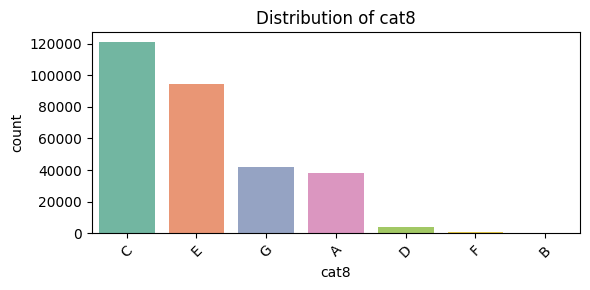

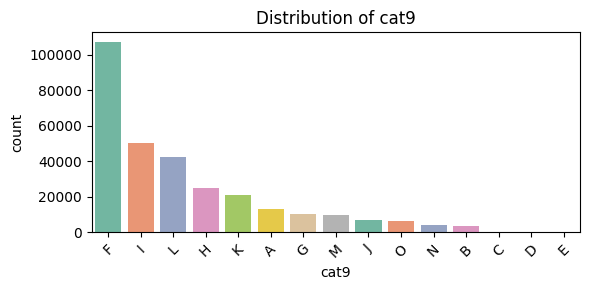

In [7]:
cat_features = [col for col in train.columns if 'cat' in col]


for col in cat_features:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=train, x=col, order=train[col].value_counts().index, palette='Set2')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoders = {}
for col in cat_features:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])
    label_encoders[col] = le 

scaler = StandardScaler()
train[cont_features] = scaler.fit_transform(train[cont_features])
test[cont_features] = scaler.transform(test[cont_features])


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

X = train.drop(['target', 'id'], axis=1)
y = train['target']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_valid)

# Evaluation
r2 = r2_score(y_valid, xgb_preds)
mse = mean_squared_error(y_valid, xgb_preds)
print(f"XGBoost R2 Score: {r2:.4f}")
print(f"XGBoost MSE: {mse:.4f}")



XGBoost R2 Score: 0.0908
XGBoost MSE: 0.7178


In [11]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_valid)

# Evaluation
print(f"LightGBM R²: {r2_score(y_valid, lgb_preds):.4f}")
print(f"LightGBM MSE: {mean_squared_error(y_valid, lgb_preds):.4f}")



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3625
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 24
[LightGBM] [Info] Start training from score 7.456400
LightGBM R²: 0.0926
LightGBM MSE: 0.7164


In [12]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_seed=42)
cat_model.fit(X_train, y_train)
cat_preds = cat_model.predict(X_valid)

print(f"CatBoost R²: {r2_score(y_valid, cat_preds):.4f}")
print(f"CatBoost MSE: {mean_squared_error(y_valid, cat_preds):.4f}")



CatBoost R²: 0.0834
CatBoost MSE: 0.7236


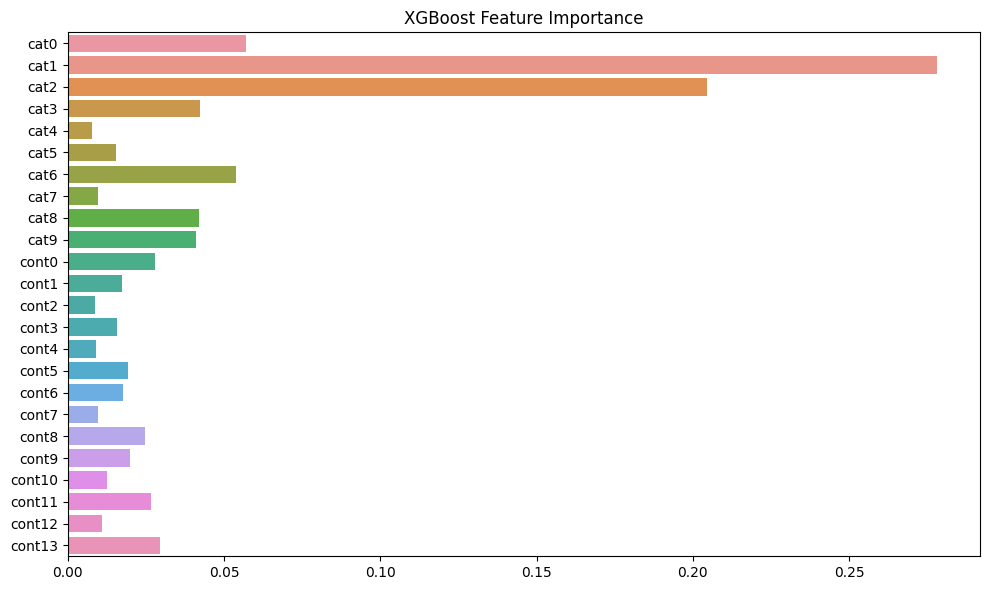

In [13]:
importances = xgb_model.feature_importances_
features = X_train.columns


plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()


In [14]:
!pip install shap
import shap

explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_valid)


100%|===================| 59837/60000 [05:09<00:00]       

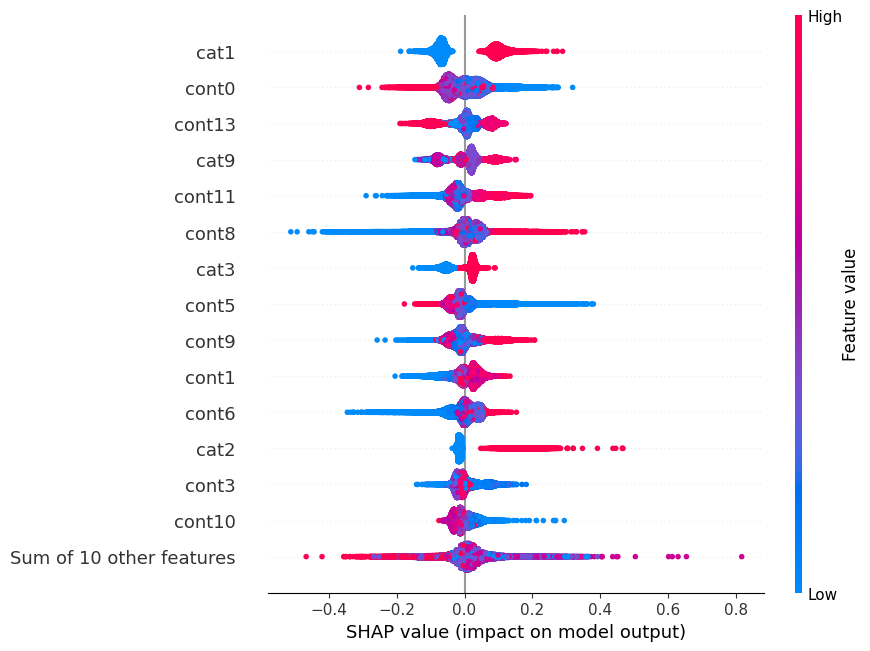

In [15]:
shap.plots.beeswarm(shap_values, max_display=15)


In [16]:

final_preds = cat_model.predict(test.drop(['id'], axis=1))

submission = pd.DataFrame({
    'id': test['id'],
    'target': final_preds
})


submission.to_csv('submission.csv', index=False)
submission.head()


,id,target
0,0,7.532102
1,5,7.848194
2,15,7.641312
3,16,7.410711
4,17,7.310498
